In [1]:
#import libraries and functions  
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as LA
from pandas import Series, DataFrame
from sympy import init_printing, Matrix, symbols, Rational
import sympy as sym
from warnings import filterwarnings
init_printing(use_latex = 'mathjax')
filterwarnings('ignore')


In [2]:
#import the dataset 
housing = pd.read_csv("C:/Users/franc/OneDrive/Desktop/DSE/python/housingml.csv")
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
#observe categorical variable 
housing["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
#create dummies for ocean  proximity
housing2= pd.get_dummies(housing, columns=["ocean_proximity"])
housing2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [5]:
#set the random seed  
np.random.seed(9)
#split the dataset in training and test set
sample_housing2 = housing2.sample(frac=1)
training_size = int(0.6* len(housing2))
training_set = sample_housing2[:training_size]
test_set = sample_housing2[training_size:]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018EB97E3B08>,
      dtype=object)

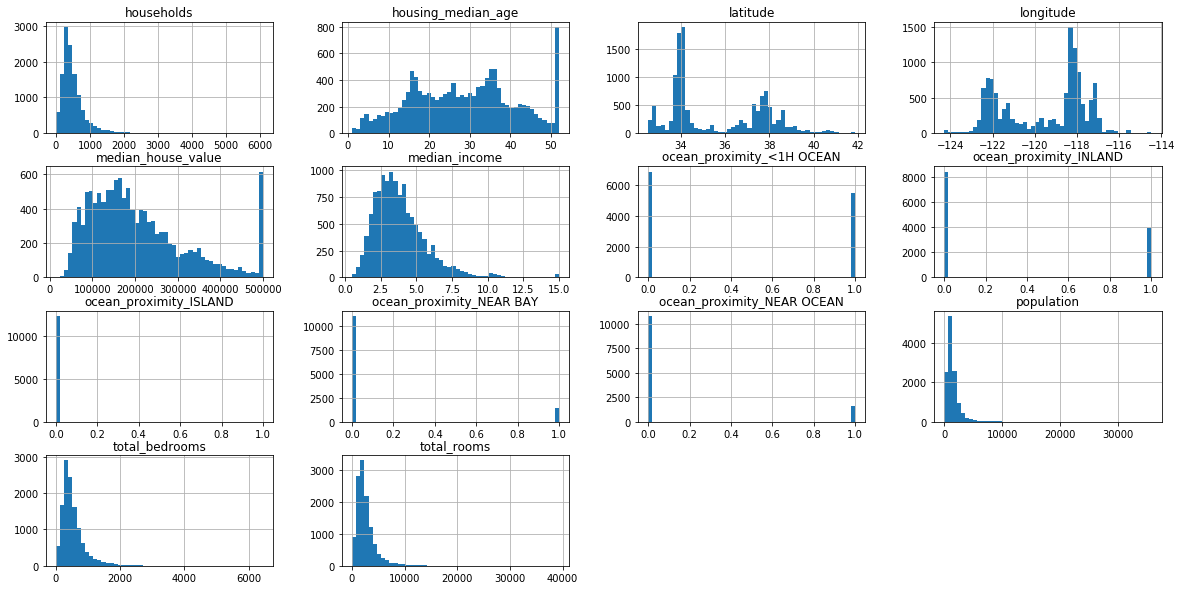

In [6]:
#descriptive analysis
training_set.hist(bins=50,figsize=(20,10))

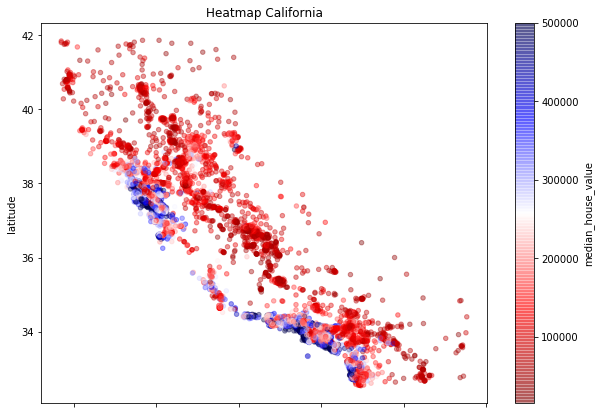

In [7]:
#price mapping 
training_set.plot(kind="scatter", x="longitude", y="latitude",
   c="median_house_value", cmap=plt.get_cmap("seismic_r"),
    colorbar=True, alpha=0.4, figsize=(10,7))
plt.title('Heatmap California')
plt.show()

In [8]:
#check null values 
training_set.isna().sum(), test_set.isna().sum()

(longitude                       0
 latitude                        0
 housing_median_age              0
 total_rooms                     0
 total_bedrooms                120
 population                      0
 households                      0
 median_income                   0
 median_house_value              0
 ocean_proximity_<1H OCEAN       0
 ocean_proximity_INLAND          0
 ocean_proximity_ISLAND          0
 ocean_proximity_NEAR BAY        0
 ocean_proximity_NEAR OCEAN      0
 dtype: int64,
 longitude                      0
 latitude                       0
 housing_median_age             0
 total_rooms                    0
 total_bedrooms                87
 population                     0
 households                     0
 median_income                  0
 median_house_value             0
 ocean_proximity_<1H OCEAN      0
 ocean_proximity_INLAND         0
 ocean_proximity_ISLAND         0
 ocean_proximity_NEAR BAY       0
 ocean_proximity_NEAR OCEAN     0
 dtype: int64)

In [9]:
#replace null values
median=training_set['total_bedrooms'].median()
training_set['total_bedrooms'] = training_set['total_bedrooms'].fillna(median)
test_set['total_bedrooms'] = test_set['total_bedrooms'].fillna(median)


In [10]:
#final check
training_set.isna().sum(), test_set.isna().sum()

(longitude                     0
 latitude                      0
 housing_median_age            0
 total_rooms                   0
 total_bedrooms                0
 population                    0
 households                    0
 median_income                 0
 median_house_value            0
 ocean_proximity_<1H OCEAN     0
 ocean_proximity_INLAND        0
 ocean_proximity_ISLAND        0
 ocean_proximity_NEAR BAY      0
 ocean_proximity_NEAR OCEAN    0
 dtype: int64,
 longitude                     0
 latitude                      0
 housing_median_age            0
 total_rooms                   0
 total_bedrooms                0
 population                    0
 households                    0
 median_income                 0
 median_house_value            0
 ocean_proximity_<1H OCEAN     0
 ocean_proximity_INLAND        0
 ocean_proximity_ISLAND        0
 ocean_proximity_NEAR BAY      0
 ocean_proximity_NEAR OCEAN    0
 dtype: int64)

In [22]:
#CHECK OUTLIERS 

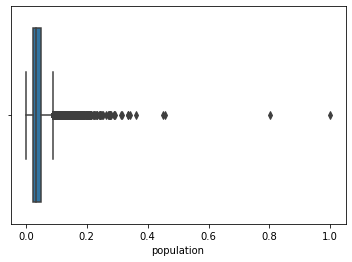

In [93]:
sns.boxplot(x=training_set['population'])

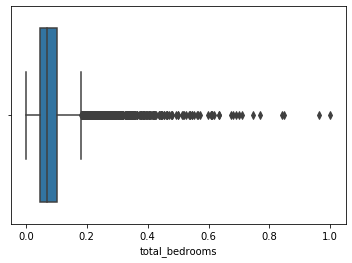

In [94]:
sns.boxplot(x=training_set['total_bedrooms'])

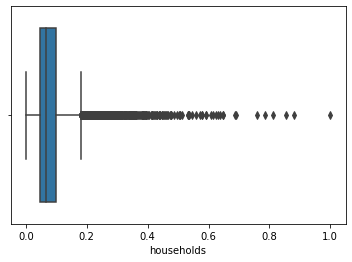

In [95]:
sns.boxplot(x=training_set['households'])

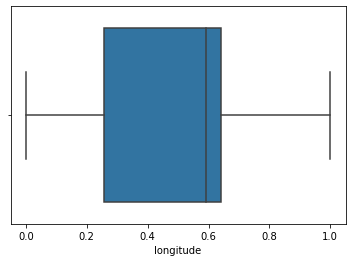

In [96]:
sns.boxplot(x=training_set['longitude'])

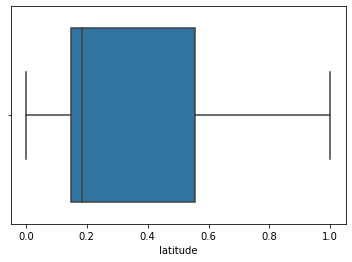

In [97]:
sns.boxplot(x=training_set['latitude'])

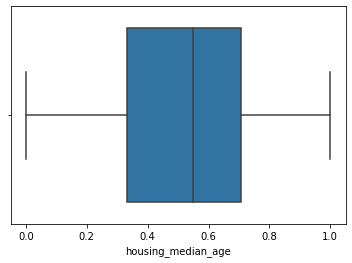

In [98]:
sns.boxplot(x=training_set['housing_median_age'])

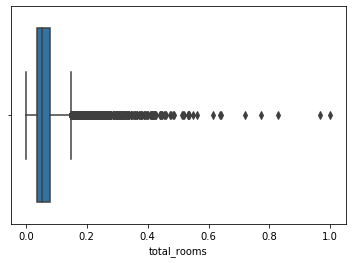

In [99]:
sns.boxplot(x=training_set['total_rooms'])

In [12]:
#NORMALIZATION: min-max scaling

In [11]:
training_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000
mean,-119.569725,35.627302,28.559109,2654.209545,540.606508,1436.843023,502.889616,3.879020,206508.097061,0.443556,0.318395,0.000242,0.110788,0.127019
std,1.997519,2.124992,12.599768,2171.812957,421.654226,1157.866349,385.164302,1.894348,114862.282378,0.496824,0.465872,0.015563,0.313882,0.333007
min,-124.300000,32.540000,1.000000,8.000000,1.000000,8.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.790000,33.930000,18.000000,1448.000000,298.000000,793.000000,280.000000,2.579425,120100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.500000,34.260000,29.000000,2144.000000,437.000000,1176.000000,411.000000,3.548500,179500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3179.250000,649.250000,1737.000000,609.000000,4.746850,264000.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.470000,41.860000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#exlude dummies from training set
training_set2=training_set.iloc[:,:9]
training_set2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20558,-121.80,38.67,10.0,2086.0,380.0,1073.0,378.0,4.5526,154400.0
11430,-117.97,33.66,22.0,3914.0,600.0,1871.0,607.0,5.8541,281500.0
2656,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0
14267,-117.11,32.69,37.0,2395.0,627.0,2489.0,599.0,1.5933,86300.0
3684,-118.37,34.21,36.0,1392.0,326.0,1181.0,303.0,3.1563,176400.0


In [14]:
training_set2.shape

(12384, 9)

In [15]:
#exlude dummies from test set
test_set2=test_set.iloc[:,:9]
test_set2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13339,-117.66,34.03,14.0,2137.0,345.0,1151.0,352.0,5.7530,185500.0
2590,-124.09,40.88,31.0,1982.0,495.0,1052.0,467.0,1.5326,74100.0
18494,-121.57,37.02,17.0,2889.0,624.0,2681.0,608.0,2.9417,178000.0
15104,-116.98,32.85,12.0,3570.0,713.0,3321.0,666.0,4.0882,134500.0
4657,-118.32,34.05,50.0,1389.0,364.0,976.0,302.0,1.5882,327300.0


In [16]:
#normalize test set without dummies
test_set2 = (test_set2-training_set2.min())/(training_set2.max() - training_set2.min()) 
test_set2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13339,0.675483,0.159871,0.254902,0.054156,0.053383,0.032040,0.057721,0.362278,0.351547
2590,0.021363,0.894850,0.588235,0.050214,0.076660,0.029265,0.076632,0.071220,0.121857
18494,0.277721,0.480687,0.313725,0.073286,0.096679,0.074929,0.099819,0.168398,0.336083
15104,0.744659,0.033262,0.215686,0.090608,0.110490,0.092869,0.109357,0.247466,0.246393
4657,0.608342,0.162017,0.960784,0.035129,0.056331,0.027135,0.049498,0.075054,0.643917


In [17]:
#check 
test_set2.max(), test_set2.min()

(longitude             1.016277
 latitude              1.009657
 housing_median_age    1.000000
 total_rooms           0.815171
 total_bedrooms        0.820764
 population            0.434462
 households            0.830291
 median_income         1.000000
 median_house_value    1.000000
 dtype: float64,
 longitude            -0.005086
 latitude              0.001073
 housing_median_age    0.000000
 total_rooms          -0.000153
 total_bedrooms        0.000155
 population           -0.000140
 households            0.000164
 median_income         0.000000
 median_house_value    0.000000
 dtype: float64)

In [18]:
#copy normalized columns to original dataset
test_set.iloc[:,:9] = test_set2
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13339,0.675483,0.159871,0.254902,0.054156,0.053383,0.032040,0.057721,0.362278,0.351547,0,1,0,0,0
2590,0.021363,0.894850,0.588235,0.050214,0.076660,0.029265,0.076632,0.071220,0.121857,0,0,0,0,1
18494,0.277721,0.480687,0.313725,0.073286,0.096679,0.074929,0.099819,0.168398,0.336083,0,1,0,0,0
15104,0.744659,0.033262,0.215686,0.090608,0.110490,0.092869,0.109357,0.247466,0.246393,1,0,0,0,0
4657,0.608342,0.162017,0.960784,0.035129,0.056331,0.027135,0.049498,0.075054,0.643917,1,0,0,0,0


In [19]:
# normalize columns in the training set without dummies
training_set2 = (training_set2-training_set2.min())/(training_set2.max() - training_set2.min()) # normalize columns in [0,1]
training_set2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20558,0.254323,0.657725,0.176471,0.052859,0.058814,0.029854,0.061996,0.279493,0.287424
11430,0.643947,0.120172,0.411765,0.099359,0.092955,0.052223,0.099655,0.369250,0.549484
2656,0.005086,0.830472,0.607843,0.036172,0.064867,0.011941,0.030587,0.099433,0.125981
14267,0.731434,0.016094,0.705882,0.060719,0.097145,0.069546,0.098339,0.075406,0.147012
3684,0.603255,0.179185,0.686275,0.035206,0.050435,0.032881,0.049663,0.183197,0.332784


In [20]:
#copy normalized column in the original dataset
training_set.iloc[:,:9] = training_set2
training_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20558,0.254323,0.657725,0.176471,0.052859,0.058814,0.029854,0.061996,0.279493,0.287424,0,1,0,0,0
11430,0.643947,0.120172,0.411765,0.099359,0.092955,0.052223,0.099655,0.369250,0.549484,1,0,0,0,0
2656,0.005086,0.830472,0.607843,0.036172,0.064867,0.011941,0.030587,0.099433,0.125981,0,0,0,0,1
14267,0.731434,0.016094,0.705882,0.060719,0.097145,0.069546,0.098339,0.075406,0.147012,0,0,0,0,1
3684,0.603255,0.179185,0.686275,0.035206,0.050435,0.032881,0.049663,0.183197,0.332784,1,0,0,0,0


In [21]:
#check 
training_set.min(), training_set.max(), test_set.min(), test_set.max()

(longitude                     0.0
 latitude                      0.0
 housing_median_age            0.0
 total_rooms                   0.0
 total_bedrooms                0.0
 population                    0.0
 households                    0.0
 median_income                 0.0
 median_house_value            0.0
 ocean_proximity_<1H OCEAN     0.0
 ocean_proximity_INLAND        0.0
 ocean_proximity_ISLAND        0.0
 ocean_proximity_NEAR BAY      0.0
 ocean_proximity_NEAR OCEAN    0.0
 dtype: float64,
 longitude                     1.0
 latitude                      1.0
 housing_median_age            1.0
 total_rooms                   1.0
 total_bedrooms                1.0
 population                    1.0
 households                    1.0
 median_income                 1.0
 median_house_value            1.0
 ocean_proximity_<1H OCEAN     1.0
 ocean_proximity_INLAND        1.0
 ocean_proximity_ISLAND        1.0
 ocean_proximity_NEAR BAY      1.0
 ocean_proximity_NEAR OCEAN    1.0
 dt

In [30]:
#run the corr function in order to identify the correlation between variables 
training_set.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924656,-0.102673,0.031489,0.058545,0.087049,0.043488,-0.020089,-0.053923,0.319265,-0.055016,0.009713,-0.475784,0.048649
latitude,-0.924656,1.000000,0.004882,-0.022602,-0.055525,-0.095070,-0.059087,-0.072366,-0.134522,-0.445981,0.350757,-0.016780,0.360759,-0.164586
housing_median_age,-0.102673,0.004882,1.000000,-0.365385,-0.322256,-0.293164,-0.305998,-0.122487,0.105187,0.047472,-0.242831,0.028961,0.256651,0.025627
total_rooms,0.031489,-0.022602,-0.365385,1.000000,0.925057,0.850026,0.916848,0.199769,0.139703,-0.008738,0.032927,-0.005927,-0.021436,-0.012547
total_bedrooms,0.058545,-0.055525,-0.322256,0.925057,1.000000,0.865660,0.972584,-0.009175,0.052594,0.012933,-0.000075,-0.003136,-0.018637,-0.001478
population,0.087049,-0.095070,-0.293164,0.850026,0.865660,1.000000,0.902337,0.003278,-0.019979,0.071316,-0.016401,-0.009575,-0.057339,-0.028960
households,0.043488,-0.059087,-0.305998,0.916848,0.972584,0.902337,1.000000,0.011308,0.068906,0.038645,-0.033837,-0.008483,-0.008265,-0.002131
median_income,-0.020089,-0.072366,-0.122487,0.199769,-0.009175,0.003278,0.011308,1.000000,0.685830,0.165965,-0.230533,-0.007333,0.055413,0.023017
median_house_value,-0.053923,-0.134522,0.105187,0.139703,0.052594,-0.019979,0.068906,0.685830,1.000000,0.248250,-0.478093,0.024629,0.162228,0.144412
ocean_proximity_<1H OCEAN,0.319265,-0.445981,0.047472,-0.008738,0.012933,0.071316,0.038645,0.165965,0.248250,1.000000,-0.610211,-0.013898,-0.315143,-0.340561


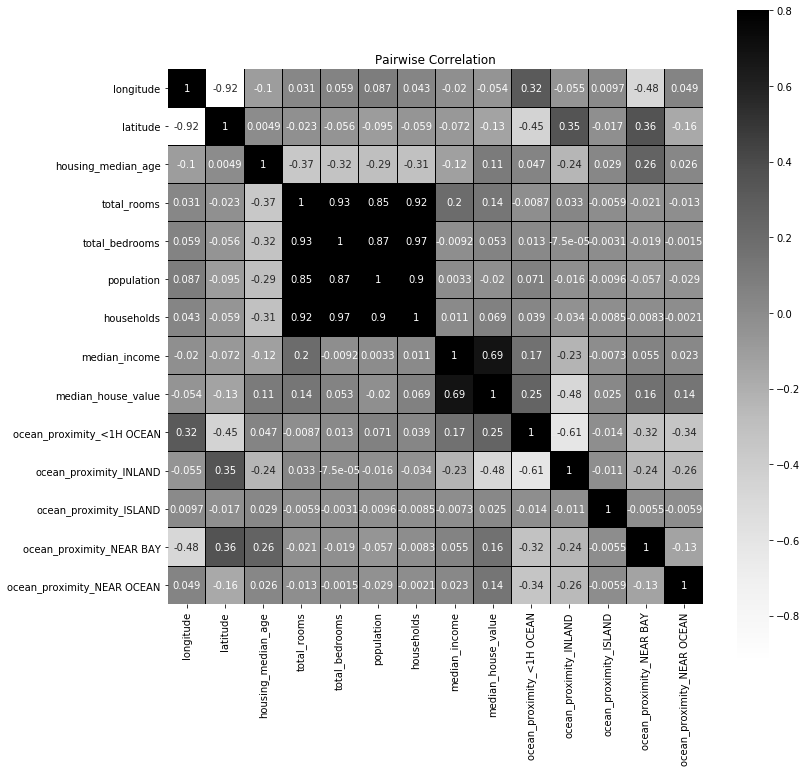

In [31]:
#visualization
import seaborn as sns
corr=training_set.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='Greys',linecolor="black")
plt.title('Pairwise Correlation');

In [32]:
#usefull correlation values
corr[((corr > 0.75) | (corr < -0.75)) & (corr != 1.0)].dropna(axis='index', how='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,NaN,-0.924656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.924656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_rooms,NaN,NaN,NaN,NaN,0.925057,0.850026,0.916848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bedrooms,NaN,NaN,NaN,0.925057,NaN,0.865660,0.972584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,NaN,NaN,NaN,0.850026,0.865660,NaN,0.902337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
households,NaN,NaN,NaN,0.916848,0.972584,0.902337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
X_train = training_set.drop(columns=['median_house_value']).values
X_train

array([[0.2543235 , 0.65772532, 0.17647059, ..., 0.        , 0.        ,
        0.        ],
       [0.6439471 , 0.12017167, 0.41176471, ..., 0.        , 0.        ,
        0.        ],
       [0.00508647, 0.8304721 , 0.60784314, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59409969, 0.18776824, 0.45098039, ..., 0.        , 0.        ,
        0.        ],
       [0.6276704 , 0.13841202, 0.84313725, ..., 0.        , 0.        ,
        0.        ],
       [0.65615463, 0.13412017, 0.88235294, ..., 0.        , 0.        ,
        0.        ]])

In [34]:
X_test=test_set.drop(columns=['median_house_value']).values
X_test

array([[0.67548321, 0.15987124, 0.25490196, ..., 0.        , 0.        ,
        0.        ],
       [0.02136317, 0.89484979, 0.58823529, ..., 0.        , 0.        ,
        1.        ],
       [0.27772126, 0.4806867 , 0.31372549, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.60834181, 0.15665236, 0.96078431, ..., 0.        , 0.        ,
        0.        ],
       [0.20651068, 0.65879828, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.20651068, 0.56974249, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [35]:
X_test.shape, X_train.shape 

((8256, 13), (12384, 13))

In [36]:
y_train= training_set['median_house_value'].values
y_train

array([0.28742356, 0.54948433, 0.12598092, ..., 0.34701094, 0.61793766,
       0.38144379])

In [37]:
y_test= test_set['median_house_value'].values
y_test

array([0.351547  , 0.12185723, 0.33608315, ..., 0.20123835, 0.17196012,
       0.18824871])

In [38]:
y_test.shape, y_train.shape

((8256,), (12384,))

In [39]:
X_train_t=X_train.T
X_train_t

array([[0.2543235 , 0.6439471 , 0.00508647, ..., 0.59409969, 0.6276704 ,
        0.65615463],
       [0.65772532, 0.12017167, 0.8304721 , ..., 0.18776824, 0.13841202,
        0.13412017],
       [0.17647059, 0.41176471, 0.60784314, ..., 0.45098039, 0.84313725,
        0.88235294],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [40]:
#  matrix with 1's on main diagnol 
I = np.identity(13, dtype = float) 
print(I) 
  

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [41]:
def bhat_ridge(lamb):
    bhat_ridge=(((LA.inv((X_train_t@X_train)+lamb*I))@X_train_t)@y_train)
    return bhat_ridge

In [42]:
bhat1=bhat_ridge(0)
bhat2=bhat_ridge(0.05)
bhat3=bhat_ridge(0.5)
bhat4=bhat_ridge(5)
bhat5=bhat_ridge(50)
bhat6=bhat_ridge(100)
bhat7=bhat_ridge(500)
bhat8=bhat_ridge(1000)
bhat9=bhat_ridge(10000)

bhat1,bhat2,bhat3,bhat4,bhat5,bhat6,bhat7,bhat8,bhat9

(array([-0.52103079, -0.46477574,  0.11592546, -0.38653257,  0.90076596,
        -2.56750629,  0.91452929,  1.16272553,  0.46799134,  0.38740312,
         0.77273622,  0.46329156,  0.48376005]),
 array([-0.51612145, -0.45990093,  0.11621331, -0.38310778,  0.90414256,
        -2.50560723,  0.8796245 ,  1.16267123,  0.46388519,  0.38262892,
         0.75648385,  0.45949888,  0.48000823]),
 array([-0.47539514, -0.42008107,  0.11837334, -0.34160809,  0.88088788,
        -2.07131035,  0.66884026,  1.16028333,  0.43070875,  0.34400491,
         0.63453679,  0.42868901,  0.44954726]),
 array([-0.27013258, -0.22472079,  0.12567885, -0.08200355,  0.47547661,
        -0.7709    ,  0.27074111,  1.12747953,  0.27423184,  0.16006467,
         0.22751085,  0.28106868,  0.30364765]),
 array([-0.01098648,  0.01856207,  0.11439766,  0.09807685,  0.12896697,
        -0.07902511,  0.10232583,  0.93280667,  0.13534892, -0.02443568,
         0.02735706,  0.14902788,  0.16930784]),
 array([ 0.04487943,  0.0

In [43]:
def ridge_regression(lamb): 
    y_pred_ridge = X_test @ (((LA.inv((X_train_t@X_train)+lamb*I))@X_train_t)@y_train)
    return y_pred_ridge


In [44]:
y_pred_ridge_1=ridge_regression(0)
y_pred_ridge_2=ridge_regression(0.05)
y_pred_ridge_3=ridge_regression(0.5)
y_pred_ridge_4=ridge_regression(5)
y_pred_ridge_5=ridge_regression(50)
y_pred_ridge_6=ridge_regression(100)
y_pred_ridge_7=ridge_regression(500)
y_pred_ridge_8=ridge_regression(1000)
y_pred_ridge_9=ridge_regression(10000)
y_pred_ridge_1, y_pred_ridge_2, y_pred_ridge_3, y_pred_ridge_4, y_pred_ridge_5, y_pred_ridge_6, y_pred_ridge_7, y_pred_ridge_8, y_pred_ridge_9

(array([0.40960692, 0.25231327, 0.20912537, ..., 0.30713555, 0.23138969,
        0.35919842]),
 array([0.4093162 , 0.25276148, 0.20987029, ..., 0.30780396, 0.23096863,
        0.3593632 ]),
 array([0.40700807, 0.25676188, 0.21426727, ..., 0.31294281, 0.22752495,
        0.360685  ]),
 array([0.39403378, 0.28153253, 0.21553812, ..., 0.33297646, 0.21156525,
        0.36730205]),
 array([0.35377647, 0.3397506 , 0.19835648, ..., 0.3629723 , 0.20044115,
        0.38992777]),
 array([0.32992563, 0.36472304, 0.19500289, ..., 0.38062704, 0.20108229,
        0.40357864]),
 array([0.26283346, 0.39430391, 0.18975554, ..., 0.43935816, 0.19998741,
        0.4258448 ]),
 array([0.24136493, 0.37339516, 0.18797643, ..., 0.45344052, 0.19757518,
        0.4129537 ]),
 array([0.16006288, 0.18644405, 0.13799894, ..., 0.30298465, 0.14215333,
        0.22606361]))

In [45]:
def mse(lamb):
    mse=np.square((ridge_regression(lamb))-(y_test)).mean()
    return mse

In [46]:
mse1=mse(0)
mse2=mse(0.05)
mse3=mse(0.5)
mse4=mse(5)
mse5=mse(50)
mse6=mse(100) 
mse7=mse(500)
mse8=mse(1000)
mse9=mse(10000)
mse1, mse2, mse3, mse4, mse5, mse6, mse7, mse8, mse9

(0.01994201487148165, 0.01996057008469971, 0.020137174234636727, 0.02127577348
880754, 0.02324025501764029, 0.02472486942432206, 0.03289181439843159, 0.03822
6779830418695, 0.08132997923169019)

In [47]:
min(mse1, mse2, mse3, mse4, mse5, mse6, mse7, mse8, mse9)

0.01994201487148165

In [48]:
lamb=([0,0.05,0.5,5,50,100,500,1000,10000])


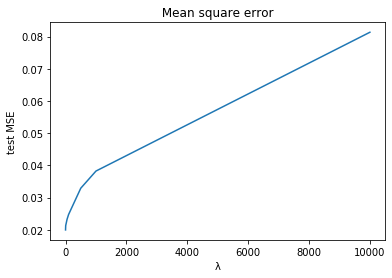

In [49]:
sns.lineplot(x=lamb,y=[mse1,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9] )
plt.xlabel('λ')
plt.ylabel('test MSE')
plt.title(' Mean square error ')
plt.show()


In [50]:
def ridge_train(lamb): 
    y_pred_ridge_train = X_train @ (((LA.inv((X_train_t@X_train)+lamb*I))@X_train_t)@y_train)
    return y_pred_ridge_train

In [51]:
y_pred_ridge_1t=ridge_train(0)
y_pred_ridge_2t=ridge_train(0.05)
y_pred_ridge_3t=ridge_train(0.5)
y_pred_ridge_4t=ridge_train(5)
y_pred_ridge_5t=ridge_train(50)
y_pred_ridge_6t=ridge_train(100)
y_pred_ridge_7t=ridge_train(500)
y_pred_ridge_8t=ridge_train(1000)
y_pred_ridge_9t=ridge_train(10000)
y_pred_ridge_1t, y_pred_ridge_2t, y_pred_ridge_3t, y_pred_ridge_4t, y_pred_ridge_5t, y_pred_ridge_6t, y_pred_ridge_7t, y_pred_ridge_8t, y_pred_ridge_9t

(array([0.30722292, 0.5560721 , 0.3229653 , ..., 0.31189163, 0.50368267,
        0.42437526]),
 array([0.30700277, 0.55621988, 0.32347086, ..., 0.31333226, 0.50326456,
        0.42431512]),
 array([0.30536415, 0.55769829, 0.3260934 , ..., 0.32325833, 0.50053983,
        0.42403378]),
 array([0.29826097, 0.56411966, 0.33110288, ..., 0.35277836, 0.49377937,
        0.4257613 ]),
 array([0.28263344, 0.54985192, 0.36105441, ..., 0.38168892, 0.48634293,
        0.43560416]),
 array([0.27232352, 0.53393696, 0.37829155, ..., 0.39259508, 0.48346526,
        0.44203384]),
 array([0.23118863, 0.47545253, 0.39340204, ..., 0.40922046, 0.48028298,
        0.4648999 ]),
 array([0.21250961, 0.44403742, 0.36995182, ..., 0.40209084, 0.47300556,
        0.46634588]),
 array([0.13804328, 0.26001033, 0.18329753, ..., 0.25163388, 0.29883858,
        0.30160678]))

In [52]:
def mse_train(lamb):
    mse_train=np.square((ridge_train(lamb))-(y_train)).mean()
    return mse_train

In [53]:
mse1t=mse_train(0)
mse2t=mse_train(0.05)
mse3t=mse_train(0.5)
mse4t=mse_train(5)
mse5t=mse_train(50)
mse6t=mse_train(100) 
mse7t=mse_train(500)
mse8t=mse_train(1000)
mse9t=mse_train(10000)
mse1t, mse2t, mse3t, mse4t, mse5t, mse6t, mse7t, mse8t, mse9t

(0.020203246461315653, 0.020204087999605602, 0.020260452025075044, 0.021118218
278572812, 0.02302329591521864, 0.024508392843007827, 0.03262614629556306, 0.0
3788642326511777, 0.08002270685404143)

In [54]:
min(mse1t, mse2t, mse3t, mse4t, mse5t, mse6t, mse7t, mse8t, mse9t)

0.020203246461315653

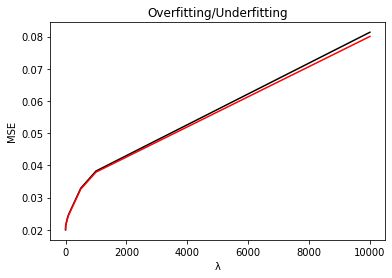

In [55]:
sns.lineplot(x=lamb, y=[mse1, mse2, mse3, mse4, mse5, mse6, mse7, mse8, mse9], color='black')
sns.lineplot(x=lamb, y=[mse1t, mse2t, mse3t, mse4t, mse5t, mse6t, mse7t, mse8t, mse9t], color='red')
plt.title('Overfitting/Underfitting')
plt.xlabel('λ')
plt.ylabel('MSE')
plt.show()


In [56]:
#pca : singular values decomposition
U, s, Vh = LA.svd(X_train_t, full_matrices=False)
U.shape, s.shape, Vh.shape

((13, 13), (13,), (13, 12384))

In [57]:
#matrix of the eigenvalues
Matrix(np.diag(np.round(s, decimals=2)))

⎡115.1  0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0 
⎢                                                                             
⎢ 0.0   68.8   0.0    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0 
⎢                                                                             
⎢ 0.0   0.0   47.55   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0 
⎢                                                                             
⎢ 0.0   0.0    0.0   41.57   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0 
⎢                                                                             
⎢ 0.0   0.0    0.0    0.0   25.34   0.0    0.0    0.0   0.0   0.0   0.0   0.0 
⎢                                                                             
⎢ 0.0   0.0    0.0    0.0    0.0   22.62   0.0    0.0   0.0   0.0   0.0   0.0 
⎢                                                                             
⎢ 0.0   0.0    0.0    0.0    0.0    0.0   13.18   0.

In [58]:
#cov matrix
covariance_matrix = np.cov(X_train.T)

In [59]:
#compute eingen value and eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[ 1.05404739e-01  1.84706530e-01 -2.92912612e-01  3.38081550e-01
  -4.74810536e-01  9.31428711e-03  3.41987838e-02  7.24469825e-01
   1.73013225e-02  7.05632982e-03  3.49413065e-02  3.93509617e-02
   9.04693805e-15]
 [-1.94924032e-01 -9.07692276e-02  3.24877330e-01 -3.51395097e-01
   5.11410028e-01  3.68655808e-02 -8.92157101e-04  6.77444334e-01
   1.11011602e-02  8.36513391e-03  3.47469644e-02  3.88626198e-02
   1.03681076e-14]
 [ 5.87463027e-02 -1.98211161e-01  1.44715014e-01  8.24927581e-01
   4.45726518e-01 -1.24166214e-01 -2.03342785e-01  1.90800149e-02
  -7.93293162e-04 -1.75855622e-03 -2.52218768e-03 -1.20900656e-03
   6.02467395e-16]
 [-2.02078747e-03  9.57840748e-03 -7.59062545e-03 -8.46395133e-02
  -6.52245602e-02 -1.82956836e-02 -4.75173481e-01  5.55470052e-02
   1.80116470e-01  2.92484529e-02 -8.46839202e-01 -9.37249950e-02
   2.21734164e-15]
 [ 7.41667774e-04  9.09723214e-03 -1.06201553e-02 -8.48487149e-02
  -7.53843310e-02  9.49147884e-02 -5.78686404e-01  

In [60]:
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

[45.87966377205148, 22.083806662810122, 16.398072331810777, 6.645812216423462, 5.798272719767115, 1.792651947457508, 1.159051018152211, 0.14880260986904664, 0.009145631300378114, 0.035287332496128365, 0.02406729415189076, 0.025366463709866463, 4.634876033052671e-15]


In [61]:
eigen_values.shape

(13,)

In [62]:
cum_variance_explained = np.cumsum(variance_explained)
print(cum_variance_explained)

[ 45.87966377  67.96347043  84.36154277  91.00735498  96.8056277
  98.59827965  99.75733067  99.90613328  99.91527891  99.95056624
  99.97463354 100.         100.        ]


In [63]:
cum_variance_explained.shape

(13,)

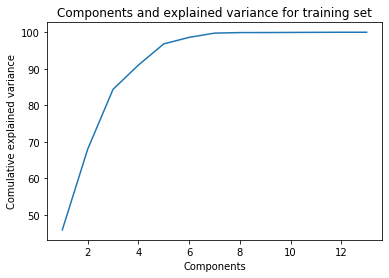

In [64]:
sns.lineplot(x = [1,2,3,4,5,6,7,8,9,10,11,12,13], y=cum_variance_explained)
plt.title('Components and explained variance for training set')
plt.xlabel('Components')
plt.ylabel('Comulative explained variance')
plt.show()

In [65]:
U_test, s_test, Vh_test = LA.svd(X_test.T, full_matrices=False)
U_test.shape, s_test.shape, Vh_test.shape

((13, 13), (13,), (13, 8256))

In [66]:
#eigenvalues
Matrix(np.diag(np.round(s_test, decimals=2)))

⎡94.03   0.0    0.0    0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0  
⎢                                                                             
⎢ 0.0   56.07   0.0    0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0  
⎢                                                                             
⎢ 0.0    0.0   39.01   0.0   0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0  
⎢                                                                             
⎢ 0.0    0.0    0.0   34.26  0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0  
⎢                                                                             
⎢ 0.0    0.0    0.0    0.0   20.9   0.0    0.0   0.0   0.0   0.0   0.0   0.0  
⎢                                                                             
⎢ 0.0    0.0    0.0    0.0   0.0   18.46   0.0   0.0   0.0   0.0   0.0   0.0  
⎢                                                                             
⎢ 0.0    0.0    0.0    0.0   0.0    0.0   10.79  0.0

In [67]:
#U matrix of the eigenvectors for X*X.t: 9 pcs 
Matrix(U)

⎡ -0.470987438707653    0.00516683502099044     0.107688109708104     0.326096
⎢                                                                             
⎢ -0.296057665280039     -0.258988761231224     -0.17870390139867     -0.28975
⎢                                                                             
⎢ -0.535418762631228    -0.0574833251313635    -0.350298818179429    -0.058294
⎢                                                                             
⎢ -0.0624012227209237    -0.014537373928738   -0.000332225336108056   0.010925
⎢                                                                             
⎢ -0.0778220492145547   -0.0147631587458803   -0.00328734744326276    0.015108
⎢                                                                             
⎢ -0.0376072385962751   -0.00469051047068978   0.00154222470063655   0.0072368
⎢                                                                             
⎢ -0.0769238642175381   -0.0114078302672616   -0.005

In [68]:
Vh.T.shape

(12384, 13)

In [69]:
#cov matrix
covariance_matrix_test = np.cov(X_test.T)

In [70]:
#compute eingen value and eigenvectors
eigen_values_test, eigen_vectors_test = np.linalg.eig(covariance_matrix_test)
Matrix(eigen_values_test), Matrix(eigen_vectors_test)


⎛⎡  0.391755552183955  ⎤  ⎡ 0.109368246716208      0.178113528398412      -0.2
⎜⎢                     ⎥  ⎢                                                   
⎜⎢  0.191241937623544  ⎥  ⎢ -0.200178152951965    -0.0823357994832814     0.32
⎜⎢                     ⎥  ⎢                                                   
⎜⎢  0.143069459277829  ⎥  ⎢ 0.0525676277101451    -0.183498750538754      0.16
⎜⎢                     ⎥  ⎢                                                   
⎜⎢ 0.0565227469506023  ⎥  ⎢-5.91428920565993e-5   0.00857712957492164    -0.01
⎜⎢                     ⎥  ⎢                                                   
⎜⎢ 0.0513719851082081  ⎥  ⎢0.00272769284579312    0.00789202935925517    -0.01
⎜⎢                     ⎥  ⎢                                                   
⎜⎢ 0.0155109461776749  ⎥  ⎢0.00349055537313848    0.00666949707496331   -0.007
⎜⎢                     ⎥  ⎢                                                   
⎜⎢ 0.00979769758352752 ⎥, ⎢0.00545316522486293    0.

In [71]:
variance_explained_test = []
for j in eigen_values_test:
     variance_explained_test.append((j/sum(eigen_values_test))*100)
        
variance_explained_test

[45.483994297487165, 22.203762401879633, 16.610793219547578, 6.56246040585102,
 5.964441511259414, 1.8008673611924177, 1.1375420680915163, 0.1514243608463963
8, 0.035103725738343756, 0.023246050275625974, 0.01908358488875984, 0.00728101
2942126699, -1.1005996500273426e-14]

In [72]:
cum_variance_explained_test = np.cumsum(variance_explained_test)

cum_variance_explained_test

array([ 45.4839943 ,  67.6877567 ,  84.29854992,  90.86101032,
        96.82545184,  98.6263192 ,  99.76386127,  99.91528563,
        99.95038935,  99.9736354 ,  99.99271899, 100.        ,
       100.        ])

Text(0.5, 1.0, 'Components and explained variance for test set')

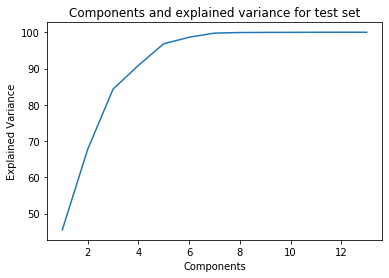

In [73]:
sns.lineplot(x = [1,2,3,4,5,6,7,8,9,10,11,12,13] , y=cum_variance_explained_test)
plt.xlabel( "Components" )
plt.ylabel("Explained Variance")
plt.title("Components and explained variance for test set")

In [74]:
#take the first 6 cp 
PC6_train = U[:,:6]
Matrix(PC6_train)


⎡ -0.470987438707653    0.00516683502099044     0.107688109708104     0.326096
⎢                                                                             
⎢ -0.296057665280039     -0.258988761231224     -0.17870390139867     -0.28975
⎢                                                                             
⎢ -0.535418762631228    -0.0574833251313635    -0.350298818179429    -0.058294
⎢                                                                             
⎢ -0.0624012227209237    -0.014537373928738   -0.000332225336108056   0.010925
⎢                                                                             
⎢ -0.0778220492145547   -0.0147631587458803   -0.00328734744326276    0.015108
⎢                                                                             
⎢ -0.0376072385962751   -0.00469051047068978   0.00154222470063655   0.0072368
⎢                                                                             
⎢ -0.0769238642175381   -0.0114078302672616   -0.005

In [75]:
#dimension projection: my new training dataset 
proj_train=PC6_train.T@X_train_t
proj_train.shape

(6, 12384)

In [76]:
PC6_test = U_test[:,:6]
Matrix(PC6_test)

⎡  -0.47062477474326     0.0105621178427609     0.101192954691962      0.32765
⎢                                                                             
⎢ -0.297209386789244     -0.263958940464457    -0.171341895342765     -0.29086
⎢                                                                             
⎢ -0.539074761696225    -0.0636264298072828    -0.337891111830692    -0.080240
⎢                                                                             
⎢ -0.0613931136145067   -0.0121533968382222   -0.00103456082176501    0.013963
⎢                                                                             
⎢ -0.0765816545462925   -0.0122884425151509   -0.00427156576236537    0.017461
⎢                                                                             
⎢ -0.0368546867298548   -0.00379472381291032   0.00095858323800591   0.0092192
⎢                                                                             
⎢ -0.0757282898008724   -0.00930559747811456   -0.00

In [77]:
#dimension reduction : new x_test reduced
proj_test=PC6_test.T@X_test.T
proj_test.shape, PC6_test.shape, X_test.shape, X_test.T.shape

((6, 8256), (13, 6), (8256, 13), (13, 8256))

In [78]:
#plt.scatter(proj_test[0,:], proj_test[1,:], c=y_test)

In [79]:
I_pc= np.identity(6, dtype = float) 
print(I_pc) 

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [80]:
#proj_test.shape, proj_train.shape, proj_train.T.shape,  alpha_vals.shape, I_pc.shape

In [81]:
#ridge regression with pca--- X_train @ (((LA.inv((X_train_t@X_train)+alpha_vals*I))@X_train_t)@y_train)
def ridge_pca(lamb): 
  y_pred_ridge_pca= proj_test.T@(((LA.inv((proj_train@proj_train.T)+lamb*I_pc))@proj_train)@y_train)
  return y_pred_ridge_pca

In [82]:
#how about alpha vals?
y_pred_ridge_pca_1=ridge_pca(0)
y_pred_ridge_pca_2=ridge_pca(0.05)
y_pred_ridge_pca_3=ridge_pca(0.5)
y_pred_ridge_pca_4=ridge_pca(5)
y_pred_ridge_pca_5=ridge_pca(50)
y_pred_ridge_pca_6=ridge_pca(100)
y_pred_ridge_pca_7=ridge_pca(500)
y_pred_ridge_pca_8=ridge_pca(1000)
y_pred_ridge_pca_9=ridge_pca(10000)
y_pred_ridge_pca_1, y_pred_ridge_pca_2, y_pred_ridge_pca_3, y_pred_ridge_pca_4, y_pred_ridge_pca_5, y_pred_ridge_pca_6, y_pred_ridge_pca_7, y_pred_ridge_pca_8, y_pred_ridge_pca_9

(array([0.24316011, 0.5413896 , 0.20893131, ..., 0.40049734, 0.22339949,
        0.43388805]),
 array([0.24315513, 0.54137872, 0.20892813, ..., 0.40051033, 0.2233962 ,
        0.43389166]),
 array([0.24311036, 0.54128079, 0.20889949, ..., 0.40062708, 0.2233666 ,
        0.4339241 ]),
 array([0.2426682 , 0.54030567, 0.20861627, ..., 0.4017818 , 0.22307352,
        0.43424188]),
 array([0.23874301, 0.53094461, 0.20607379, ..., 0.41215625, 0.22040847,
        0.43682389]),
 array([0.23524727, 0.52129597, 0.20376234, ..., 0.42158818, 0.21792485,
        0.43864206]),
 array([0.22240929, 0.46297801, 0.1947178 , ..., 0.45653002, 0.20726086,
        0.43436797]),
 array([0.21749007, 0.41533358, 0.1907952 , ..., 0.46312745, 0.20173078,
        0.41561561]),
 array([0.15704121, 0.19284332, 0.13814983, ..., 0.30393147, 0.14251149,
        0.22589351]))

In [83]:
y_pred_ridge_pca_1

array([0.24316011, 0.5413896 , 0.20893131, ..., 0.40049734, 0.22339949,
       0.43388805])

In [84]:
def mse_pca(lamb):
    mse_pca=np.square((ridge_pca(lamb))-(y_test)).mean()
    return mse_pca

In [85]:
mse1_pca=mse_pca(0)
mse2_pca=mse_pca(0.05)
mse3_pca=mse_pca(0.5)
mse4_pca=mse_pca(5)
mse5_pca=mse_pca(50)
mse6_pca=mse_pca(100) 
mse7_pca=mse_pca(500)
mse8_pca=mse_pca(1000)
mse9_pca=mse_pca(10000)
mse1_pca, mse2_pca, mse3_pca, mse4_pca, mse5_pca, mse6_pca, mse7_pca, mse8_pca, mse9_pca

(0.03614135136013137, 0.036141315514206664, 0.036141001521629613, 0.0361387002
77158965, 0.03618665723812377, 0.03634899613652398, 0.03876313043193853, 0.041
79141917599276, 0.08176826469515759)

In [86]:
min(mse1_pca, mse2_pca, mse3_pca, mse4_pca, mse5_pca, mse6_pca, mse7_pca, mse8_pca, mse9_pca), mse5_pca

(0.036138700277158965, 0.03618665723812377)

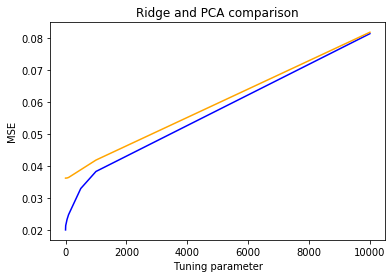

In [87]:
sns.lineplot(x=lamb, y=[mse1,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9], color='blue')
sns.lineplot(x=lamb, y=[mse1_pca, mse2_pca,mse3_pca, mse4_pca, mse5_pca, mse6_pca, mse7_pca, mse8_pca, mse9_pca], color='orange')
plt.title('Ridge and PCA comparison')
plt.xlabel('Tuning parameter')
plt.ylabel('MSE')
plt.show()

In [88]:
def ridge_pca_train(lamb): 
 y_pred_r_pcat= proj_train.T@(((LA.inv((proj_train@proj_train.T)+lamb*I_pc))@proj_train)@y_train)
 return y_pred_r_pcat

In [89]:
y_pred_r_pcat_1=ridge_pca_train(0)
y_pred_r_pcat_2=ridge_pca_train(0.05)
y_pred_r_pcat_3=ridge_pca_train(0.5)
y_pred_r_pcat_4=ridge_pca_train(5)
y_pred_r_pcat_5=ridge_pca_train(50)
y_pred_r_pcat_6=ridge_pca_train(100)
y_pred_r_pcat_7=ridge_pca_train(500)
y_pred_r_pcat_8=ridge_pca_train(1000)
y_pred_r_pcat_9=ridge_pca_train(10000)
y_pred_r_pcat_1, y_pred_r_pcat_2, 
y_pred_r_pcat_3, y_pred_r_pcat_4, y_pred_r_pcat_5, y_pred_ridge_pca_6, y_pred_r_pcat_7, y_pred_r_pcat_8, y_pred_r_pcat_9

(array([0.27040366, 0.50454878, 0.48738678, ..., 0.46453   , 0.43512825,
        0.42267252]),
 array([0.26954766, 0.50382743, 0.48679404, ..., 0.46411903, 0.43582963,
        0.42355135]),
 array([0.26176207, 0.49716388, 0.48092991, ..., 0.46027788, 0.44208424,
        0.43142415]),
 array([0.23524727, 0.52129597, 0.20376234, ..., 0.42158818, 0.21792485,
        0.43864206]),
 array([0.22309263, 0.45796966, 0.43122533, ..., 0.43526173, 0.46604785,
        0.463574  ]),
 array([0.20773832, 0.43401915, 0.39149356, ..., 0.41706506, 0.46487528,
        0.46560546]),
 array([0.13747708, 0.25885686, 0.18576178, ..., 0.25336509, 0.29790569,
        0.30152414]))

In [90]:
def mse_pca_train(lamb):
    mse_pca_t=np.square((ridge_pca_train(lamb))-(y_train)).mean()
    return mse_pca_t

In [91]:
mse1_pca_t=mse_pca_train(0)
mse2_pca_t=mse_pca_train(0.05)
mse3_pca_t=mse_pca_train(0.5)
mse4_pca_t=mse_pca_train(5)
mse5_pca_t=mse_pca_train(50)
mse6_pca_t=mse_pca_train(100) 
mse7_pca_t=mse_pca_train(500)
mse8_pca_t=mse_pca_train(1000)
mse9_pca_t=mse_pca_train(10000)
mse1_pca_t, mse2_pca_t, mse3_pca_t, mse4_pca_t, mse5_pca_t, mse6_pca_t, mse7_pca_t, mse8_pca_t, mse9_pca_t

(0.03554670998766554, 0.035546710079880445, 0.03554671919427651, 0.03554761597
771868, 0.035624482159073205, 0.035813258195245064, 0.038317359090033525, 0.04
133555778616508, 0.08044561138666378)

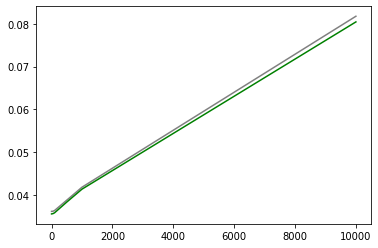

In [92]:
sns.lineplot(x=lamb, y=[mse1_pca, mse2_pca,mse3_pca, mse4_pca, mse5_pca, mse6_pca, mse7_pca, mse8_pca, mse9_pca], color='grey')
sns.lineplot(x=lamb, y=[ mse1_pca_t, mse2_pca_t, mse3_pca_t, mse4_pca_t, mse5_pca_t, mse6_pca_t, mse7_pca_t, mse8_pca_t, mse9_pca_t], color='green')
plt.xlabel=("Lamda")
plt.ylabel=("MSE training/test")
plt.show()